<a href="https://colab.research.google.com/github/leakydishes/Fairness_feedback_nlp_test/blob/main/Fairness_feedback_nlp_test_tables14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Deakin University Internship 2023**
##Human-Guided Fair Classification for NLP
#####Te' Claire

#####*Phase 1*

*@inproceedings{
dorner2023humanguided,
title={Human-Guided Fair Classification for Natural Language Processing},
author={Florian E. Dorner and Momchil Peychev and Nikola Konstantinov and Naman Goel and Elliott Ash and Martin Vechev},
booktitle={The Eleventh International Conference on Learning Representations },
year={2023},
url={https://openreview.net/forum?id=N_g8TT9Cy7f}
}*

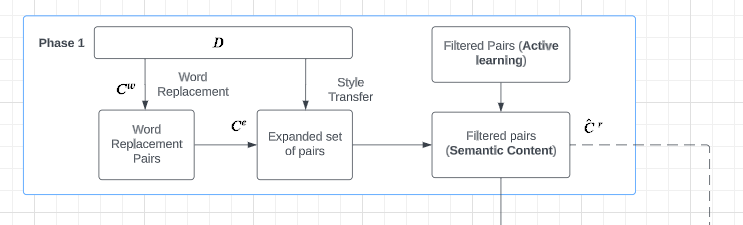

##**Step 1. Mount Google Drive**

In [1]:
from google.colab import drive
#drive.mount('/content/drive')
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


##**Step 2.Download the train.csv file from the Civil comments dataset to Code/Datasets/Kaggle_Toxicity**
####Set up a virtual environment with the required packages

####Note: Google Colab already has Python pre-installed therefore you don't need to create a virtual environment. Instead install dependencies.

In [2]:
#import os
#os.chdir("/content/drive/MyDrive/fairness-feedback-nlp-master/Code")
%cd /content/drive/MyDrive/fairness-feedback-nlp/Code

/content/drive/MyDrive/fairness-feedback-nlp/Code


In [3]:
!sudo apt-get update
!sudo apt-get install python3.8
!python3.8 -m ensurepip --upgrade

Get:1 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:9 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy/main Sources [2,231 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:11 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy/main amd64 Packages [1,145 kB]
Get:12 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [44.8 kB]
Get:1

In [4]:
#list python versions
!ls /usr/bin/python*

/usr/bin/python3     /usr/bin/python3.10-config  /usr/bin/python3-config
/usr/bin/python3.10  /usr/bin/python3.8


In [5]:
#update python version
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1

update-alternatives: using /usr/bin/python3.8 to provide /usr/bin/python3 (python3) in auto mode


In [6]:
#permanently install the specific version to the google colab
!sudo apt install python3-pip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-setuptools python3-wheel
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  python3-pip python3-setuptools python3-wheel
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 1,677 kB of archives.
After this operation, 8,965 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-setuptools all 59.6.0-1.2ubuntu0.22.04.1 [339 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-wheel all 0.37.1-2ubuntu0.22.04.1 [32.0 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-pip all 22.0.2+dfsg-1ubuntu0.3 [1,305 kB]
Fetched 1,677 kB in 1s (2,015 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog

In [7]:
#Install correct packages
!sudo apt-get install python3.8-distutils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3.8-lib2to3
The following NEW packages will be installed:
  python3.8-distutils python3.8-lib2to3
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 319 kB of archives.
After this operation, 1,237 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.8-lib2to3 all 3.8.18-1+jammy1 [126 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.8-distutils all 3.8.18-1+jammy1 [193 kB]
Fetched 319 kB in 0s (1,671 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize fron

##Step 3: Then, run

In [8]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 100.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 112.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.2/27.2 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 736.6/736.6 KB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 KB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 65.8 MB/s eta 0:00:00
  Preparing metadata (set

Check file path and script is granted permission to be executed as a program

In [9]:
#cd /content/drive/MyDrive/fairness-feedback-nlp-master/Code

In [10]:
#!chmod +x Generation.sh
!chmod +x Generation_Quick.sh

###Add transformers

In [11]:
!pip install transformers

In [12]:
!source Fairness-Feedback-NLP/bin/activate

####Run code

In [13]:
#!./Generation_Quick.sh

##**Train the transfer pipeline and generate pairs using style transfer and word replacement.**
###Results are found in folders Code/generations.
######Note: Generating modified comments for all original comments in the dataset can take a long time.


In [14]:
!chmod +x Tables.sh

In [15]:
!./Tables.sh

Source folder: generations
Source folder: /content/drive/MyDrive/fairness-feedback-nlp/Code/generations/
Source pool: pool_nogpt
Creates Data Pools for training data
Downloading: 100% 570/570 [00:00<00:00, 2.69MB/s]
Downloading: 100% 420M/420M [00:05<00:00, 82.0MB/s]
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be ex